In [230]:
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
df = pd.read_csv("Salary.csv")

In [232]:
import matplotlib.pyplot as plt


In [233]:
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce').dt.year
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], errors='coerce').dt.year

In [234]:
df['DOJ'] = df['DOJ'].fillna(0).astype(int)

In [235]:
df['LEAVES USED'] = df['LEAVES USED'].fillna(0).astype(int)

In [236]:
df = df[df['CURRENT DATE'] != 0]
df = df[df['AGE'] != 0]
df = df[df['LAST NAME'] != 0]
df = df[df['SALARY'] != 0]
df = df[df['DOJ'] != 0]

df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014,2016,Analyst,21.0,44570,Finance,24,6.0,2.0,0
2,OLIVE,ANCY,F,2014,2016,Analyst,21.0,40955,Finance,23,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013,2016,Analyst,22.0,45550,IT,22,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014,2016,Analyst,NaN,43161,Operations,27,3.0,NaN,3
5,VICTORIA,NaN,F,2013,2016,Analyst,22.0,48736,Marketing,20,10.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011,2016,Senior Manager,36.0,185977,Management,15,15.0,5.0,10
2635,LOUISE,ALTARAS,F,2014,2016,Analyst,23.0,45758,IT,17,13.0,2.0,0
2636,RENEE,ALVINO,F,2014,2016,Analyst,21.0,47315,Web,29,1.0,5.0,0
2637,TERI,ANASTASIO,F,2014,2016,Analyst,24.0,45172,Web,23,7.0,3.0,1


## Total number of men and women 

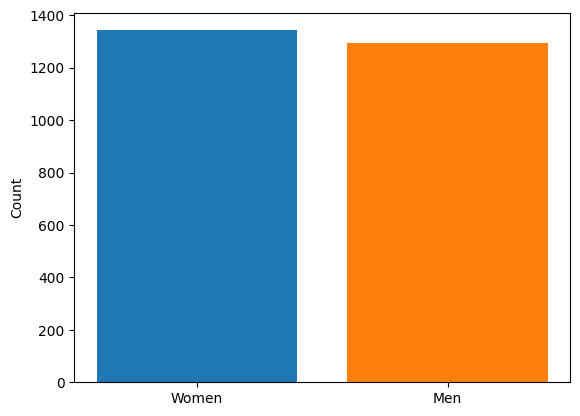

In [237]:
num_women=df[df["SEX"]=="F"]["FIRST NAME"].count()
num_men=df[df["SEX"]=="M"]["FIRST NAME"].count()
fig, ax = plt.subplots()
ax.bar("Women", num_women)
ax.bar("Men", num_men)
ax.set_ylabel("Count")
plt.show()

Women are more than men

In [238]:
unit_salary= df.groupby("UNIT")["SALARY"].mean()
unit_salary

UNIT
Finance       58599.100897
IT            58998.108460
Management    59186.941176
Marketing     59318.045662
Operations    55477.926941
Web           57128.079070
Name: SALARY, dtype: float64

## what is the average salary of each Unit?

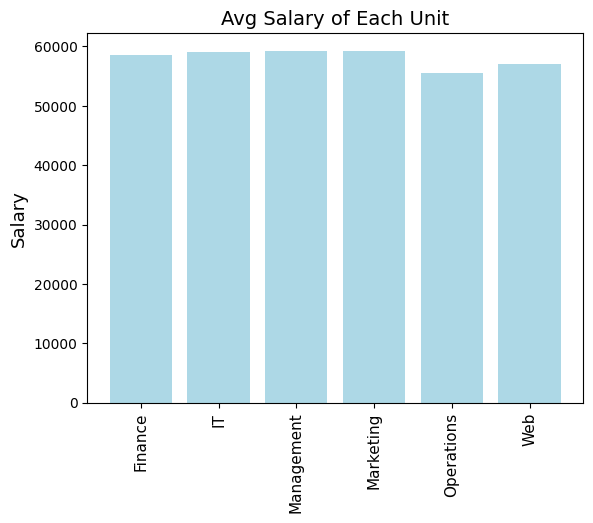

In [239]:

plt.bar(unit_salary.index, unit_salary.values, color="LightBlue")
plt.xticks(rotation=90, fontsize=11)
plt.title("Avg Salary of Each Unit", fontsize=14)
plt.ylabel("Salary", fontsize=13)
plt.show()

## Average salary of each unit is almost same which is between 50-60k per year

In [243]:
years = df.groupby(["DOJ"])["FIRST NAME"].count()
years

DOJ
2009       5
2010      25
2011      75
2012     200
2013    1096
2014    1145
2015      92
Name: FIRST NAME, dtype: int64

## How many workers joined company each year?

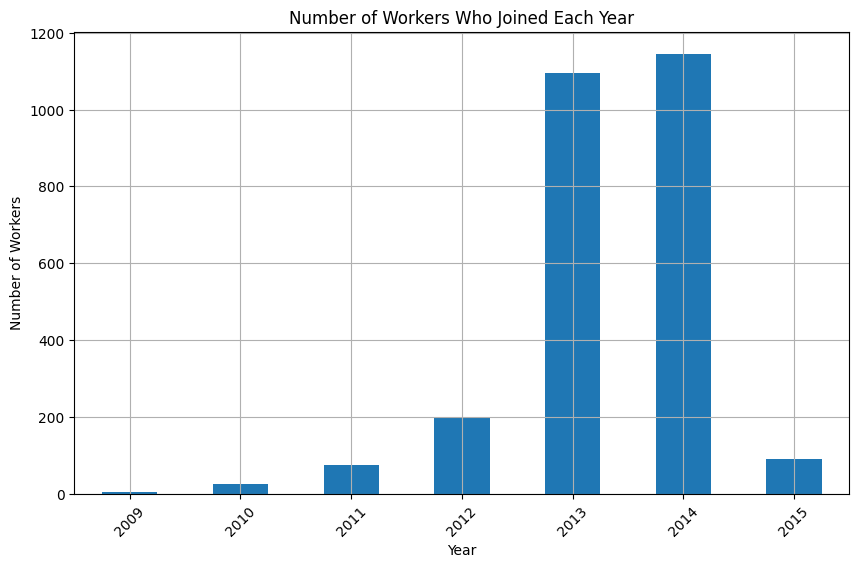

In [244]:
fig, ax = plt.subplots(figsize=(10, 6))
years.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Workers')
ax.set_title('Number of Workers Who Joined Each Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


As it is shown from the graph in 2012 and 2013 there were a significant number of new workers wich was between 1000 and 1200

In [252]:
faculty_leaves=df.groupby(["UNIT"])["LEAVES USED"].sum()
faculty_leaves=faculty_leaves.sort_values(ascending=False).head(3)
faculty_leaves

UNIT
IT            10160
Operations    10067
Finance       10021
Name: LEAVES USED, dtype: int64

## top3 Faculties which has most vacation days

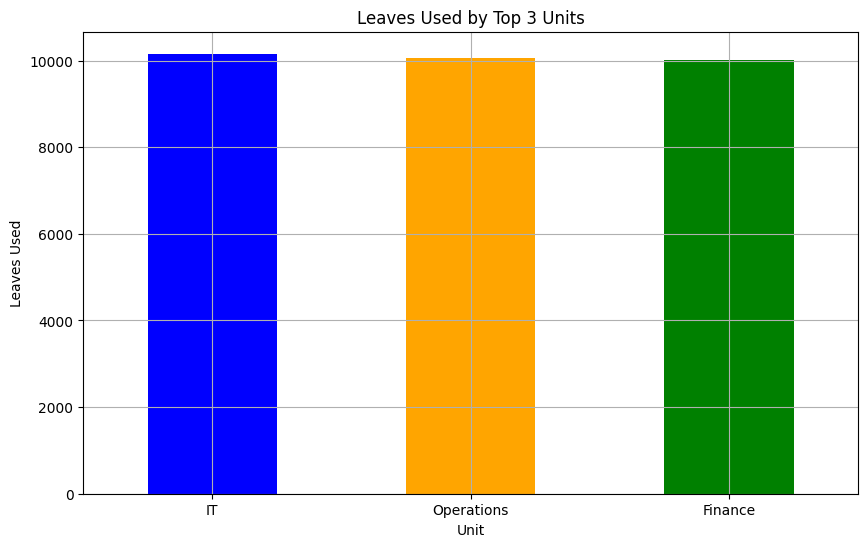

In [253]:
fig, ax = plt.subplots(figsize=(10, 6))
faculty_leaves.plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'])
ax.set_xlabel('Unit')
ax.set_ylabel('Leaves Used')
ax.set_title('Leaves Used by Top 3 Units')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


This diagram tells us about top 3 faculty which has taken most vacation days in the company

In [255]:
df_count = df.groupby(["DESIGNATION"])["DESIGNATION"].count()
df_count


DESIGNATION
Analyst           1949
Associate          158
Director            32
Manager             81
Senior Analyst     356
Senior Manager      62
Name: DESIGNATION, dtype: int64

In [256]:
df_salary = df.groupby(["DESIGNATION"])["SALARY"].max()
df_salary

DESIGNATION
Analyst            49980
Associate          99603
Director          388112
Manager           148890
Senior Analyst     69966
Senior Manager    199577
Name: SALARY, dtype: int64

number of employees and max salary on each department

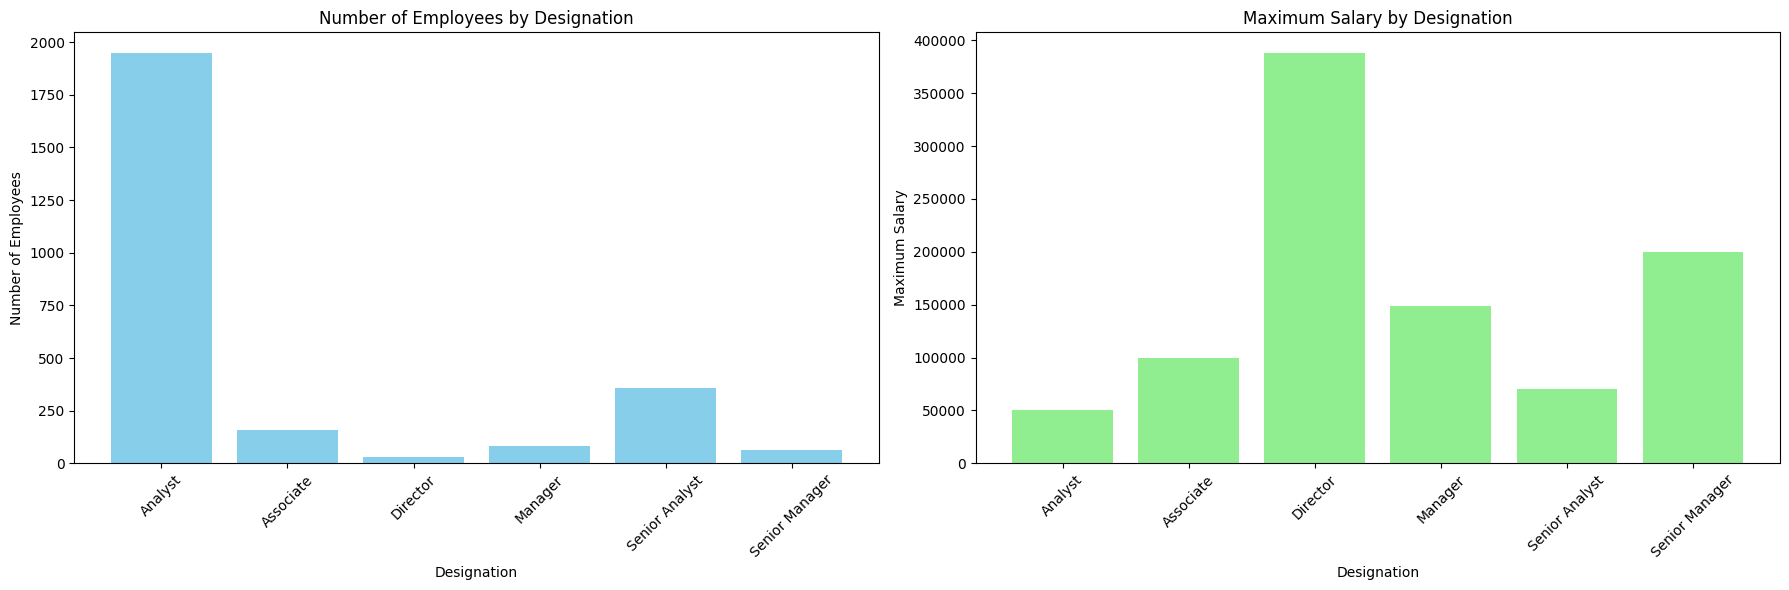

In [259]:

designations = ['Analyst', 'Associate', 'Director', 'Manager', 'Senior Analyst', 'Senior Manager']
employee_counts = [1949, 158, 32, 81, 356, 62]

max_salaries = [49980, 99603, 388112, 148890, 69966, 199577]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].bar(designations, employee_counts, color='skyblue')
axes[0].set_xlabel('Designation')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('Number of Employees by Designation')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(designations, max_salaries, color='lightgreen')
axes[1].set_xlabel('Designation')
axes[1].set_ylabel('Maximum Salary')
axes[1].set_title('Maximum Salary by Designation')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


As it is shown the most number of employees are Analyst with almost 2000 workers, but Directors gets the most higest salary in the company

In [263]:
company_age = df["AGE"]
company_age

0       21.0
2       21.0
3       22.0
4        NaN
5       22.0
        ... 
2634    36.0
2635    23.0
2636    21.0
2637    24.0
2638    24.0
Name: AGE, Length: 2638, dtype: float64

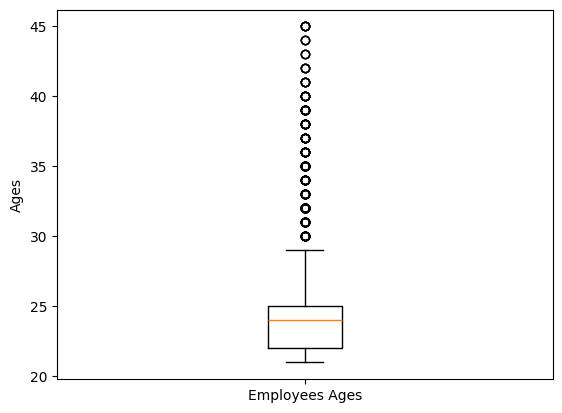

In [266]:
fig, ax = plt.subplots()
ax.boxplot(df["AGE"].dropna())  # Drop any missing values if present
ax.set_xticklabels(["Employees Ages"])
ax.set_ylabel("Ages")
plt.show()


In [270]:
mens_age=df[df["SEX"]=="M"]
mens_age=mens_age["AGE"]
women_age = df[df["SEX"]=="F"]
women_age = women_age["AGE"]

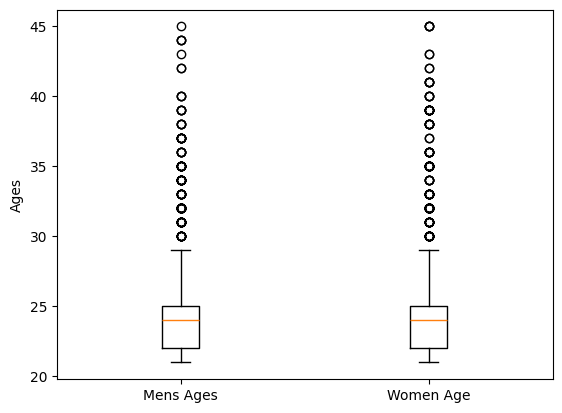

In [272]:
fig, ax = plt.subplots()
ax.boxplot([mens_age.dropna(), women_age.dropna()])
ax.set_xticklabels(["Mens Ages", "Women Age"])
ax.set_ylabel("Ages")
plt.show()

## AS it is shown, in both genders most employees are in the age of between 22 and 30

In [279]:
exp_by_gender=df.groupby(["UNIT", "SEX"])["PAST EXP"].max()
exp_by_gender

UNIT        SEX
Finance     F      19
            M      13
IT          F      17
            M      23
Management  F      18
            M      16
Marketing   F      16
            M      18
Operations  F      15
            M      15
Web         F      17
            M      16
Name: PAST EXP, dtype: int64

## Which gender has the mpst experience in each department?

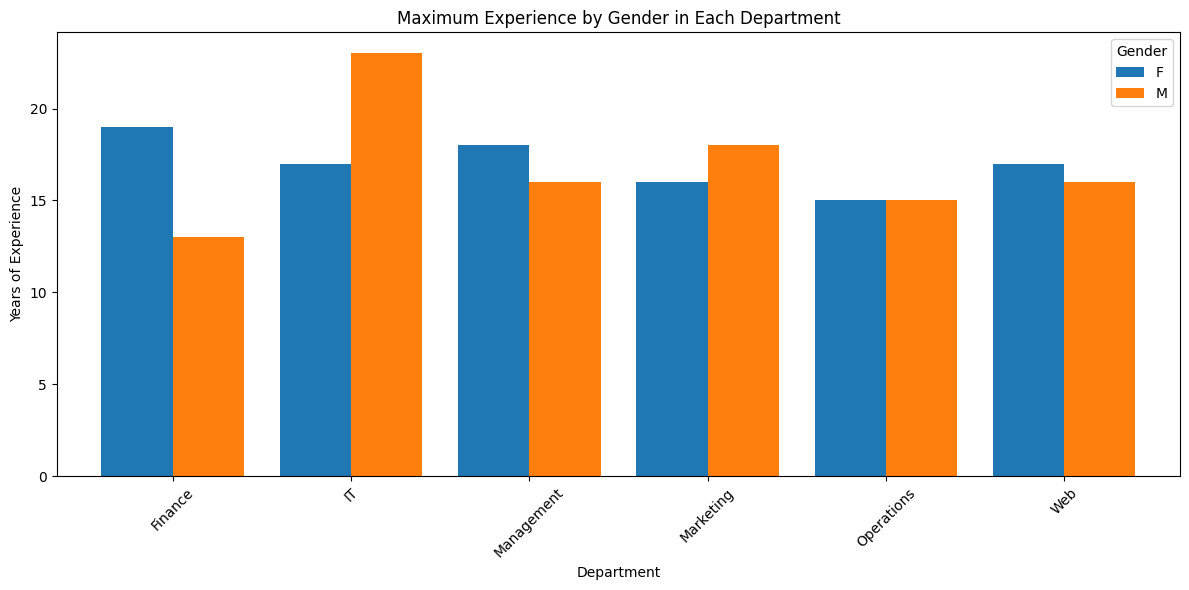

In [283]:
exp_by_gender_df = exp_by_gender.unstack()

exp_by_gender_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Maximum Experience by Gender in Each Department')
plt.xlabel('Department')
plt.ylabel('Years of Experience')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


As we can see women are considered most experienced on Finace, Management, Web where men are the most experienced on IT, Marketing departments. In Operations men and women are considered same.

In [285]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014,2016,Analyst,21.0,44570,Finance,24,6.0,2.0,0
2,OLIVE,ANCY,F,2014,2016,Analyst,21.0,40955,Finance,23,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013,2016,Analyst,22.0,45550,IT,22,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014,2016,Analyst,NaN,43161,Operations,27,3.0,NaN,3
5,VICTORIA,NaN,F,2013,2016,Analyst,22.0,48736,Marketing,20,10.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011,2016,Senior Manager,36.0,185977,Management,15,15.0,5.0,10
2635,LOUISE,ALTARAS,F,2014,2016,Analyst,23.0,45758,IT,17,13.0,2.0,0
2636,RENEE,ALVINO,F,2014,2016,Analyst,21.0,47315,Web,29,1.0,5.0,0
2637,TERI,ANASTASIO,F,2014,2016,Analyst,24.0,45172,Web,23,7.0,3.0,1


In [297]:
most_rating_emp_salary = df.groupby(["UNIT", "RATINGS"])["SALARY"].mean()
most_rating_emp_salary

UNIT        RATINGS
Finance     2.0        58058.864407
            3.0        56480.241379
            4.0        55629.831776
            5.0        64572.885714
IT          2.0        60030.065041
            3.0        57753.379630
            4.0        63434.180180
            5.0        54923.285714
Management  2.0        54358.166667
            3.0        59633.200000
            4.0        61384.437500
            5.0        60760.345794
Marketing   2.0        58802.660870
            3.0        59021.468468
            4.0        65979.500000
            5.0        53526.301887
Operations  2.0        53352.343434
            3.0        52964.185841
            4.0        56748.633333
            5.0        58852.380952
Web         2.0        59692.491525
            3.0        53761.515152
            4.0        53498.260870
            5.0        61700.714286
Name: SALARY, dtype: float64

Avarage Salary By the rating of the employee

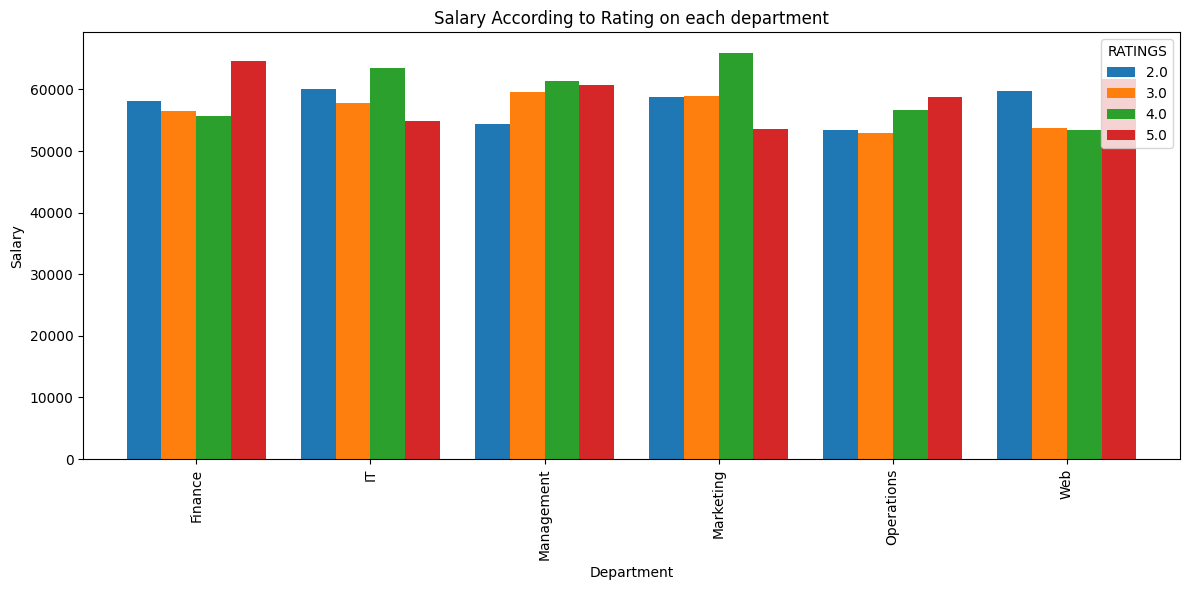

In [295]:
most_rating_emp_salary_df = most_rating_emp_salary.unstack()

most_rating_emp_salary_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Salary According to Rating on each department')
plt.xlabel('Department')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Looking at the Grpagh, We can say that average salary is not depend on expereince, is some departments such as WEB, FINANCE and IT avarege salary for 2 years experienced employyee is higher than 3 years experienced employee's salary